# The Attention Mechanism
Copyright 2021-2024, Denis Rothman, MIT License. Denis Rothman rewrote the reference notebook entirely in basic Python with no frameworks. Three more steps were added, and a Hugging Face transformer example was added. The original images were taken out, redesigned by Denis Rothman for educational purposes, and inserted in the book descriptions of the multi-attention sub-layer.

The goal of this notebook is to obtain a mathematical view of the attention mechanism of transformer models. An industry 4.0 developer will become and AI expert with in-depth NLP knowledge.

**June 10,2024 update** The typos in the Figures for Steps 6 and 7 have been fixed.

**Note:** In some instances, the actual numerical values include many decimal places. To simplify visualization, some figures in the notebook display rounded values for the attention heads' flow.

[The Reference Colaboratory Notebook was written by Manuel Romero](https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF)

[A Medium article was written by Raimi Karim](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a)

#Step 1: Represent the input

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [2]:
import requests
from PIL import Image
from io import BytesIO

def get_image_from_github(image_name):
    # The base URL of the image files in the GitHub repository
    base_url = 'https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/02/'

    # Make the request
    response = requests.get(base_url + image_name)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the image
        image = Image.open(BytesIO(response.content))

        # Return the image
        return image
    else:
        print(f'Error {response.status_code}: Could not access the image file.')
        return None

In [3]:
import numpy as np
from scipy.special import softmax

In [4]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


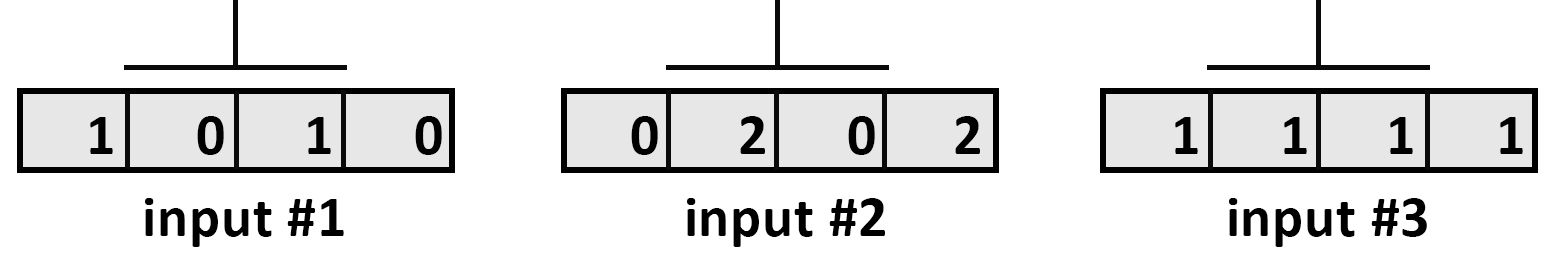

In [5]:
display(get_image_from_github('B19899_02_11.png') or print('Image not found'))

#Step 2: Initializing the weight matrices

In [6]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [7]:
print("w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [8]:
print("w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


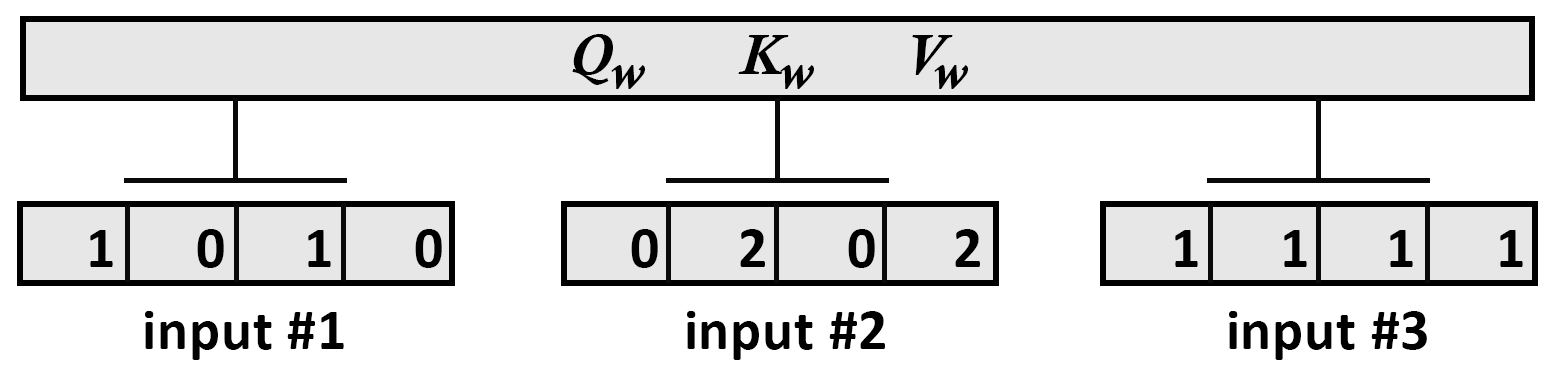

In [9]:
display(get_image_from_github('B19899_02_12.png') or print('Image not found'))

#Step 3: Matrix multiplication to obtain Q, K, and V

In [10]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [11]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

Step 3: Matrix multiplication to obtain Q,K,V
Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [12]:
print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


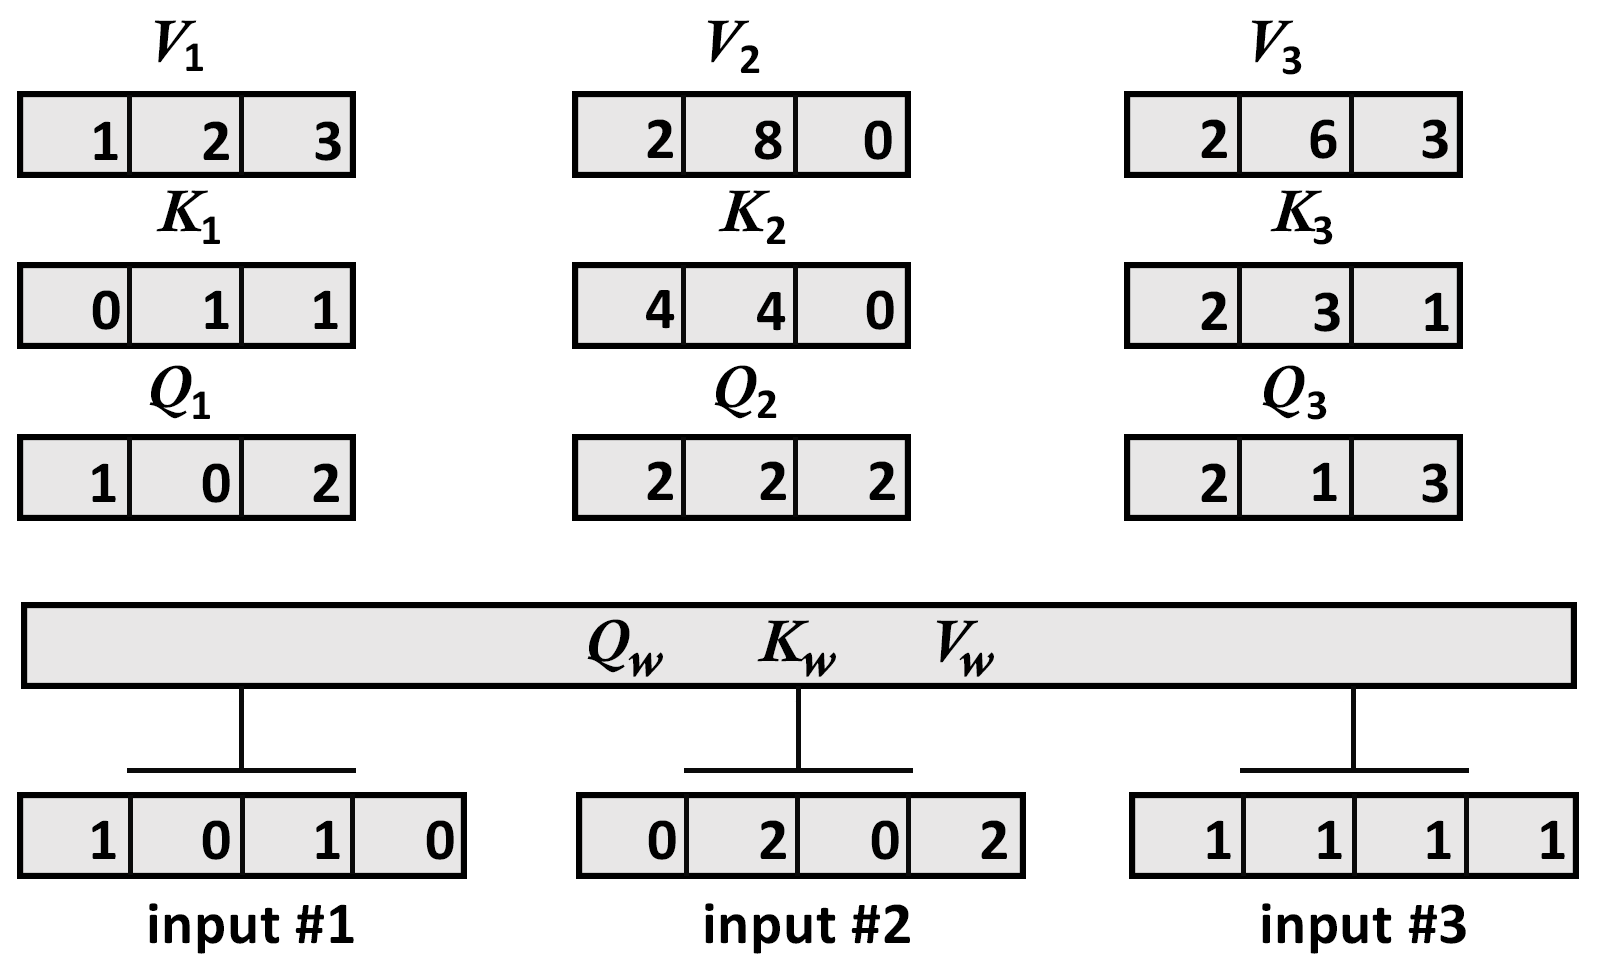

In [13]:
display(get_image_from_github('B19899_02_13.png') or print('Image not found'))

#Step 4: Scaled attention scores

In [14]:
print("Step 4: Scaled Attention Scores")
k_d=1   #square root of k_d simplified to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


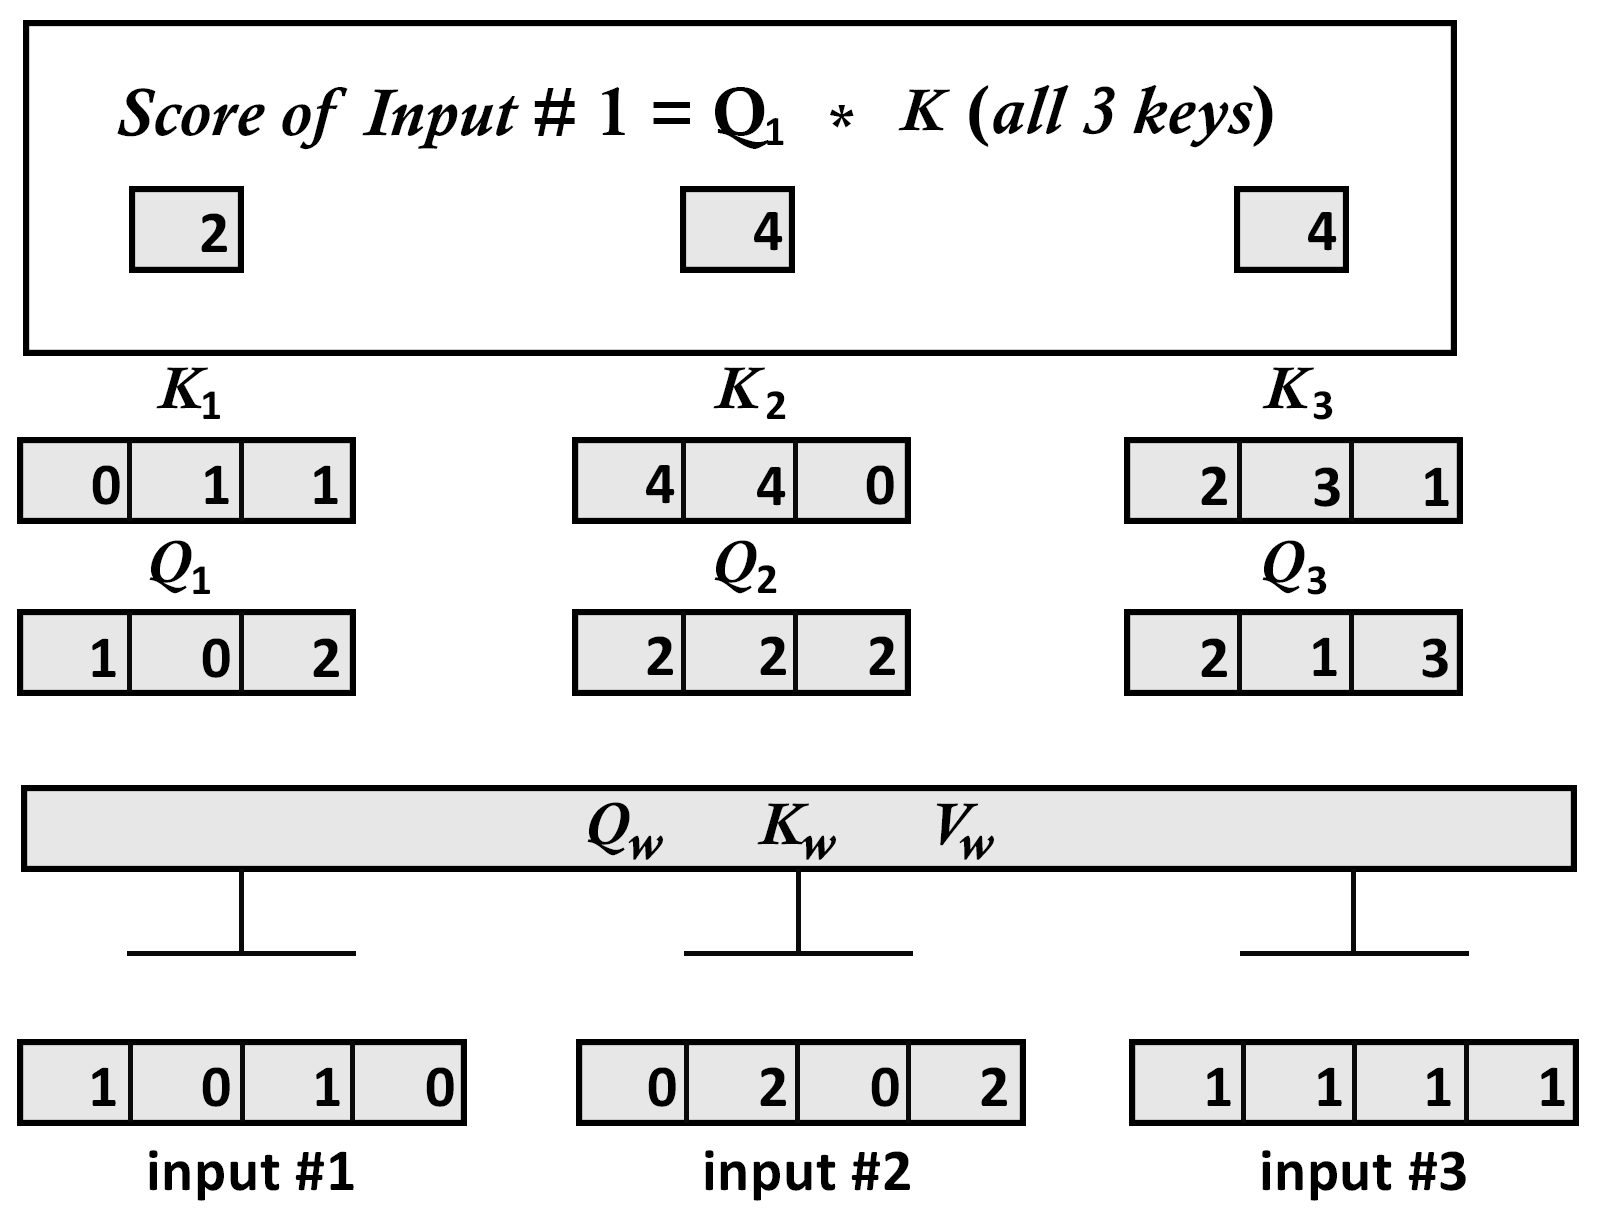

In [15]:
display(get_image_from_github('B19899_02_14.png') or print('Image not found'))

#Step 5: Scaled softmax attention scores for each vector

In [16]:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


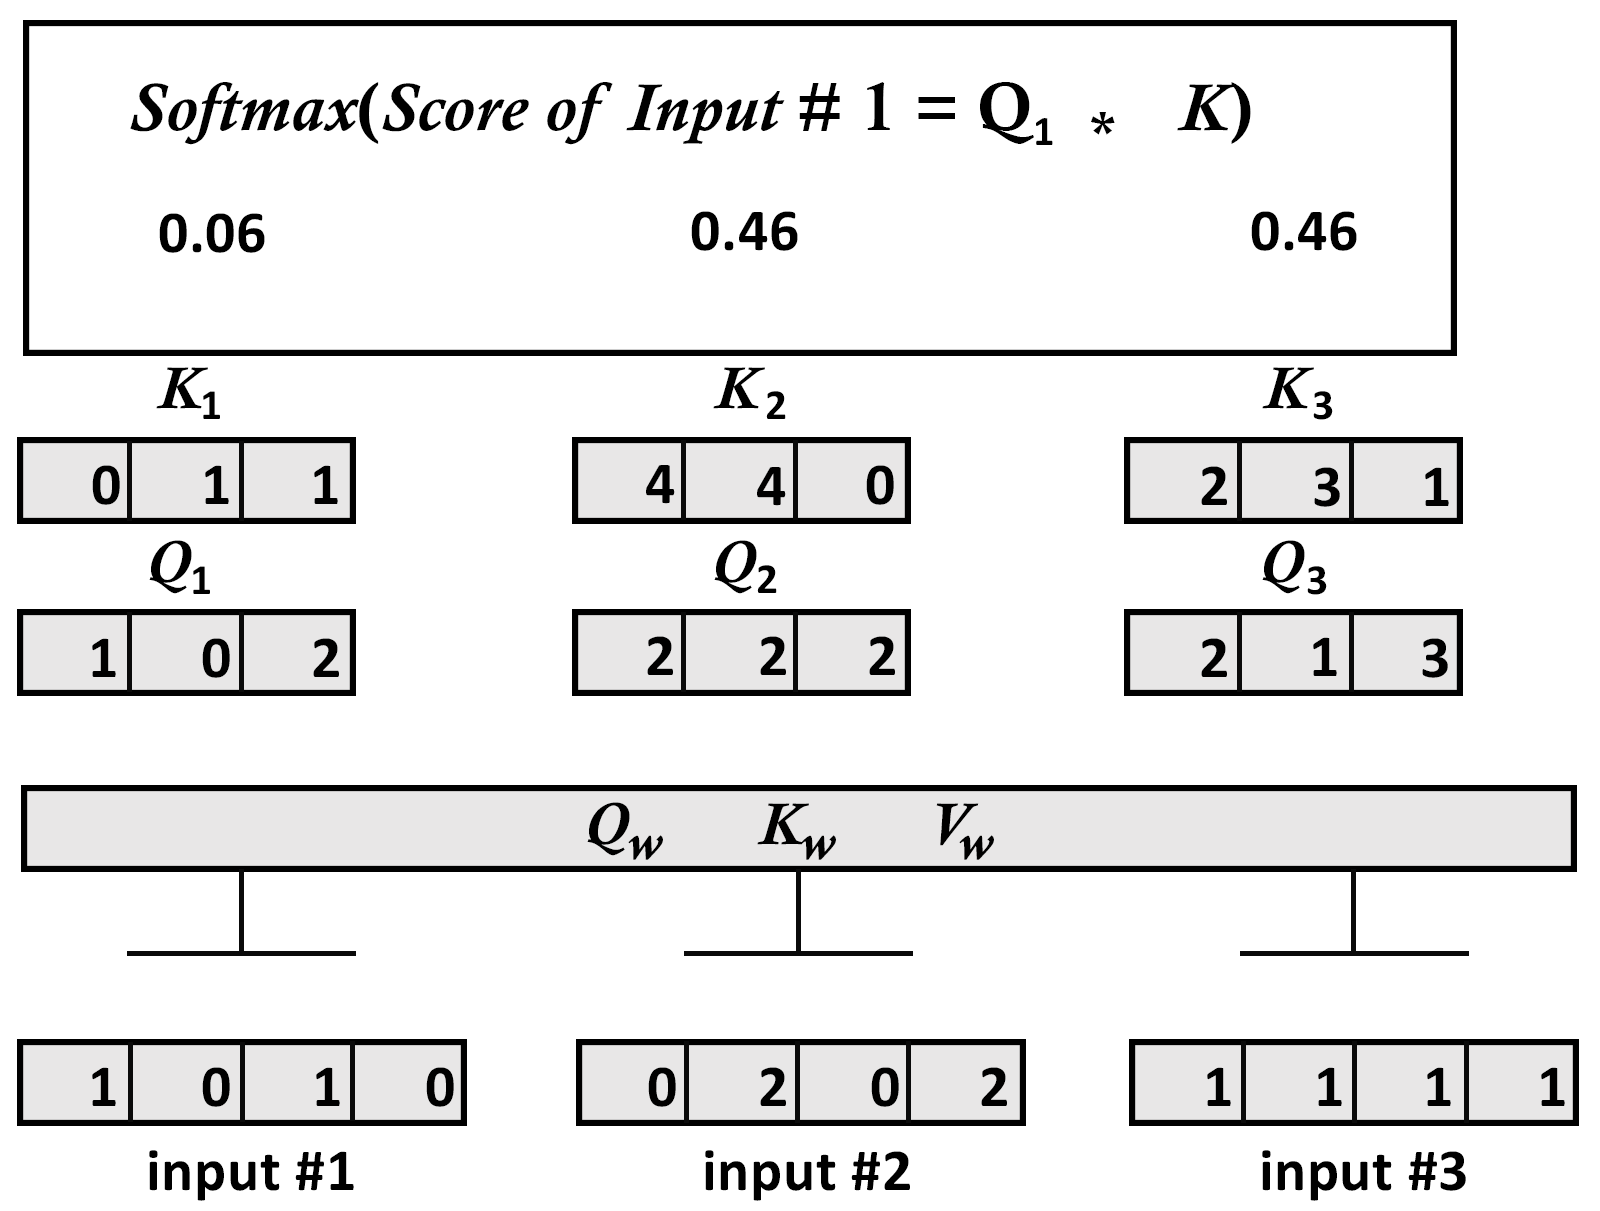

In [17]:
display(get_image_from_github('B19899_02_15.png') or print('Image not found'))

#Step 6: The final attention representations

In [18]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


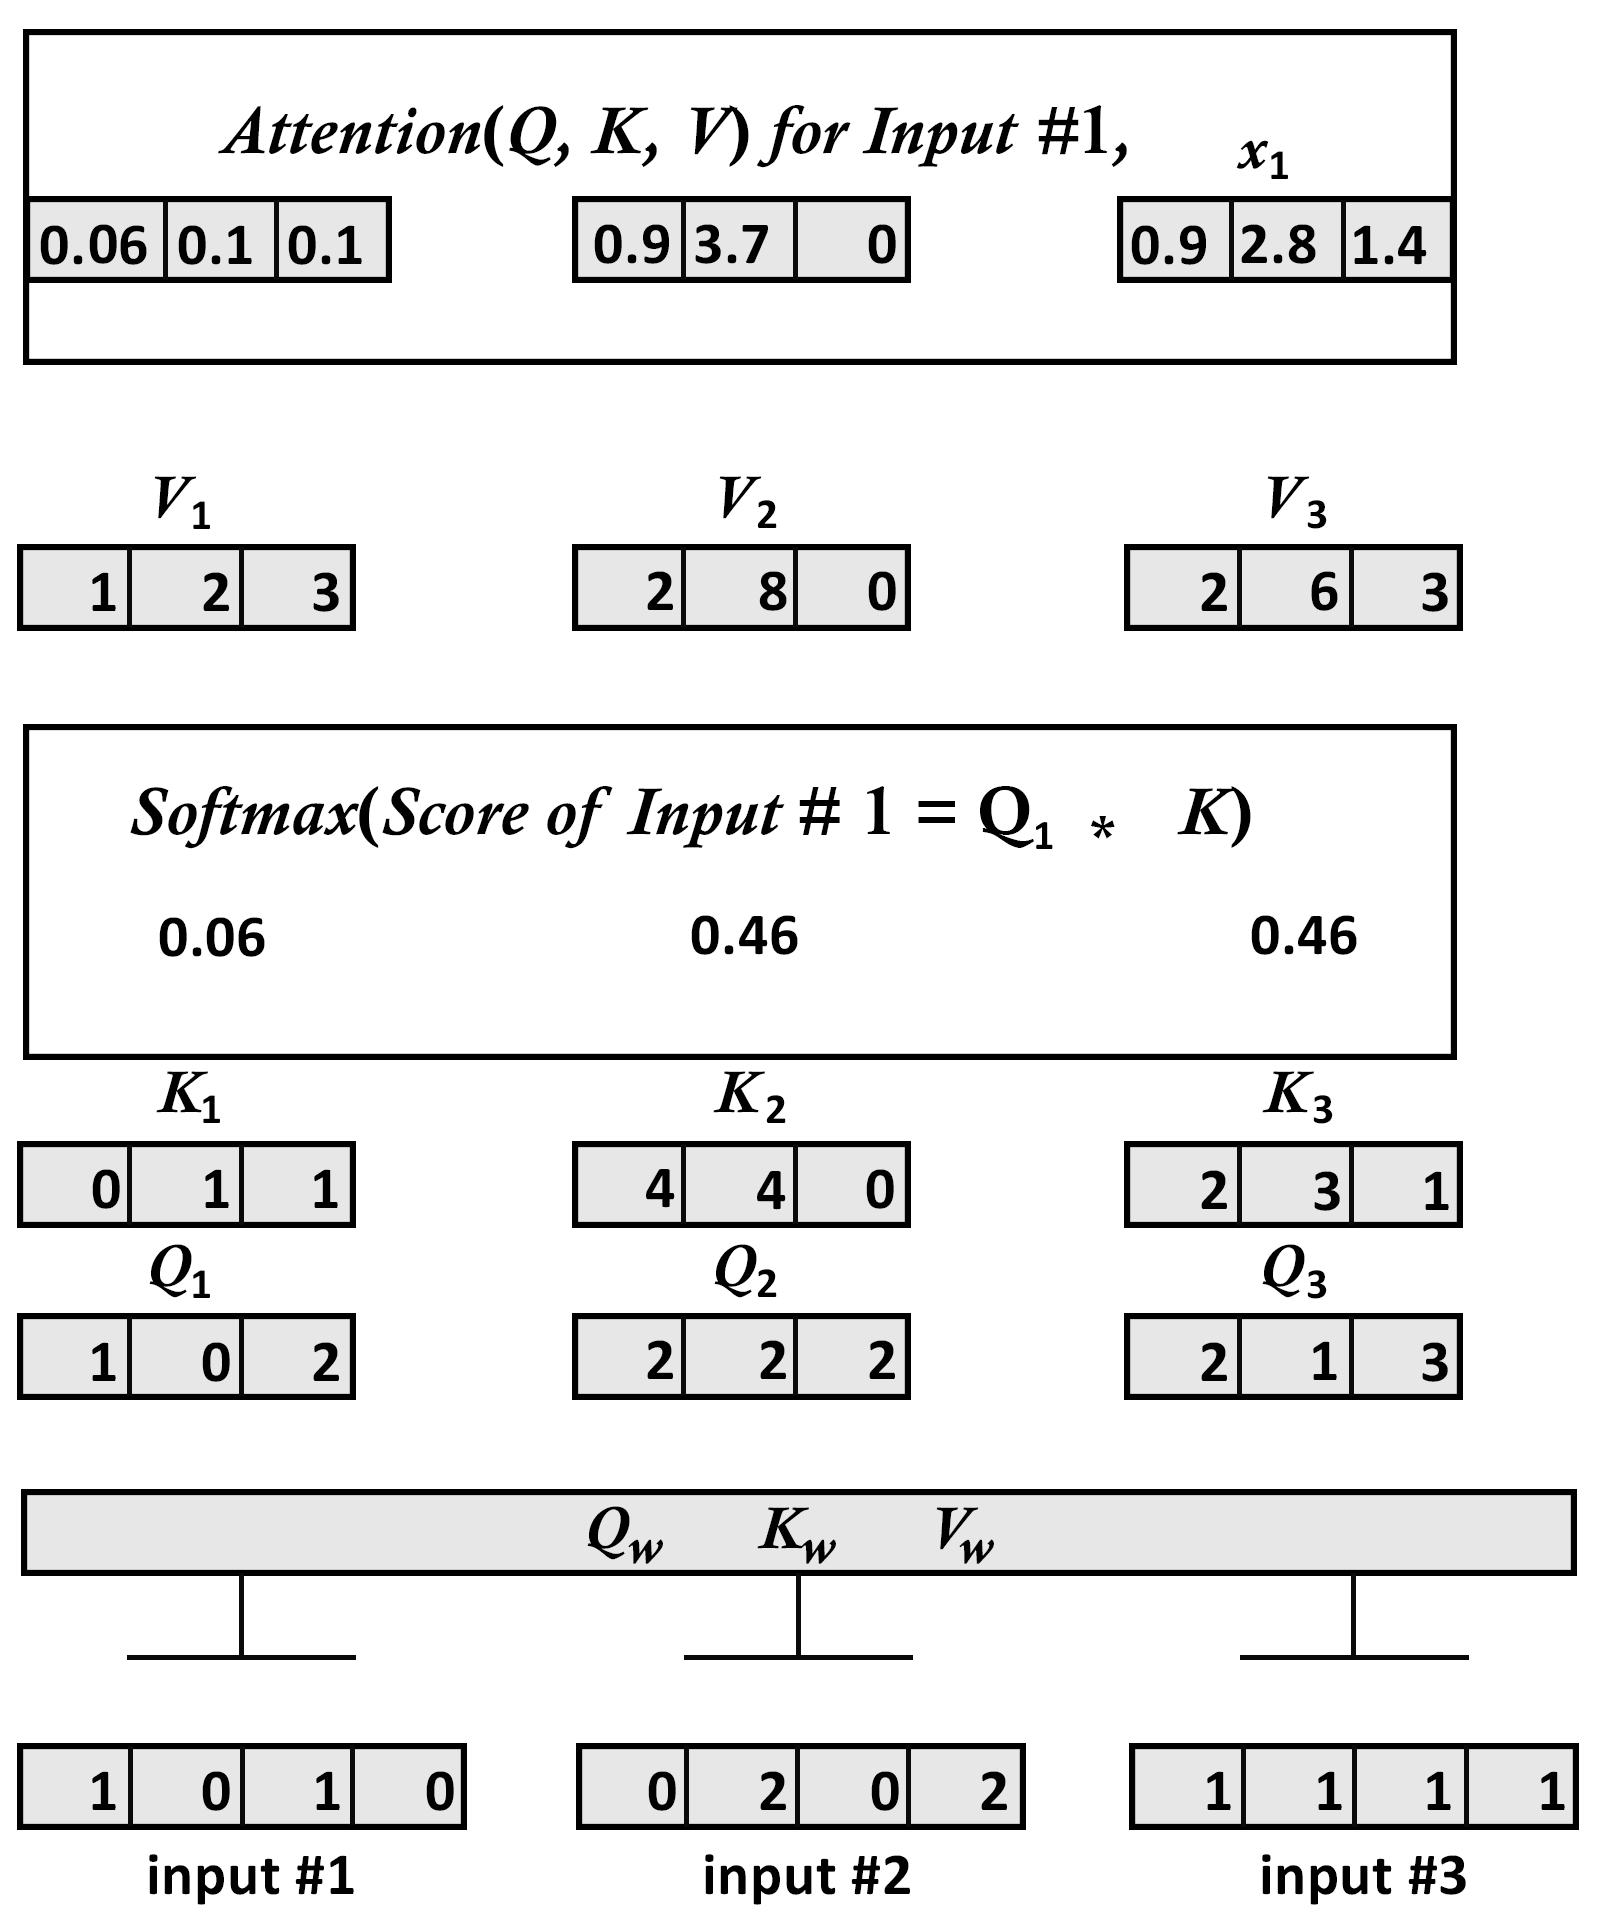

In [19]:
display(get_image_from_github('B19899_02_16.png') or print('Image not found'))

#Step 7: Summing up the results

In [20]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


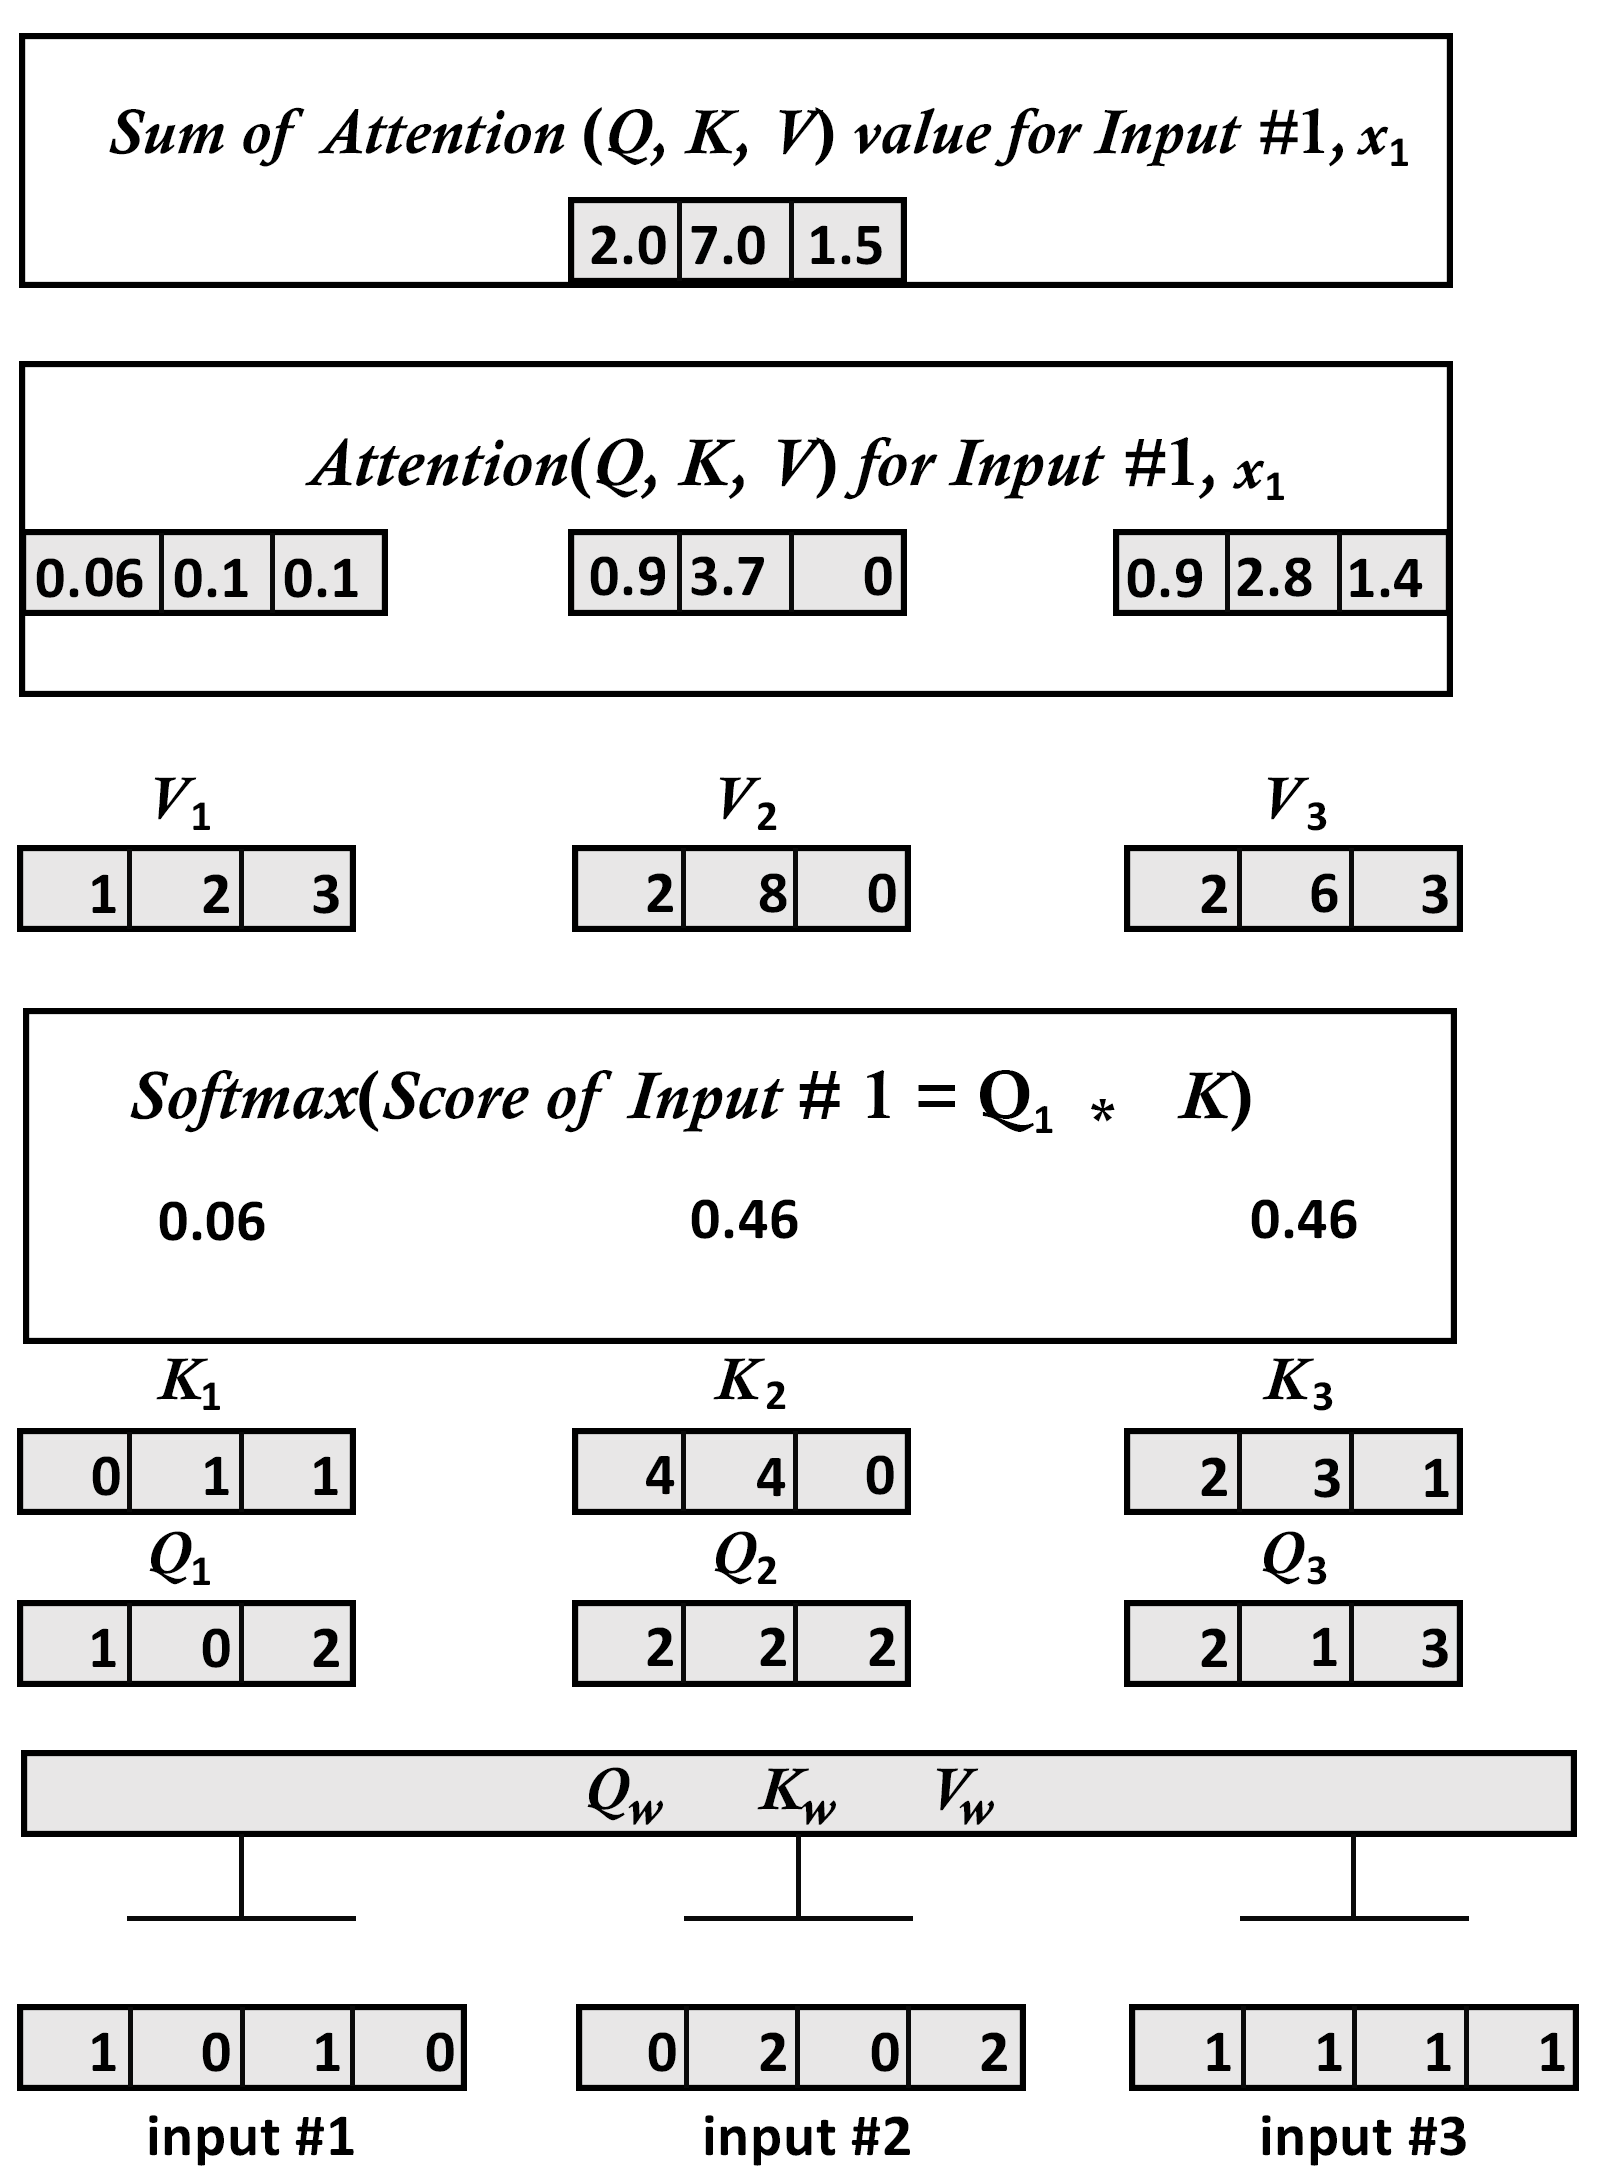

In [21]:
display(get_image_from_github('B19899_02_17.png') or print('Image not found'))

#Step 8: Steps 1 to 7 for all the inputs

In [22]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[7.66686539e-01 2.40660351e-01 8.26231178e-01 3.19747069e-01
  2.28496273e-01 9.41696980e-01 2.79753568e-01 4.38014168e-01
  9.65813954e-02 7.18248452e-01 2.68573031e-01 8.70817263e-01
  6.93440255e-01 3.75364997e-01 5.83125391e-03 5.21598484e-01
  6.58934481e-01 4.91374202e-01 3.36974959e-01 7.52886234e-01
  9.86603602e-01 4.69432598e-01 4.44087302e-01 7.38771062e-01
  2.61848728e-01 8.77826421e-02 8.19134504e-02 5.43787588e-02
  6.03723809e-01 4.43263641e-01 4.31016450e-01 6.72270443e-01
  6.87179630e-01 9.74891718e-01 4.61205389e-01 8.08207468e-01
  6.09631351e-01 5.76129891e-01 4.93765091e-01 9.79162469e-01
  4.30505588e-01 9.19471983e-02 7.70000735e-01 8.63680750e-01
  4.11816154e-01 8.16232819e-01 3.17724333e-01 7.39521119e-01
  9.02633914e-02 8.40071128e-01 7.21377789e-01 9.76109178e-01
  4.20571725e-02 4.05897570e-01 3.33746204e-01 7.94160662e-02
  4.61588027e-01 4.82750432e-01 1.34511343e-01 3.79522620e-01
  1.09552918e-01 2.67646316e-01 

#Step 9: The output of the heads of the attention sublayer

In [23]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
shape of one head (3, 64) dimension of 8 heads 512


#Step 10: Concatenation of the output of the heads

In [24]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model
[[0.11841654 0.92930879 0.82342428 ... 0.05133976 0.91601505 0.38338011]
 [0.99977749 0.203596   0.1061474  ... 0.55479998 0.28724468 0.28537789]
 [0.35551919 0.07216936 0.80443534 ... 0.76154722 0.07812463 0.72584978]]


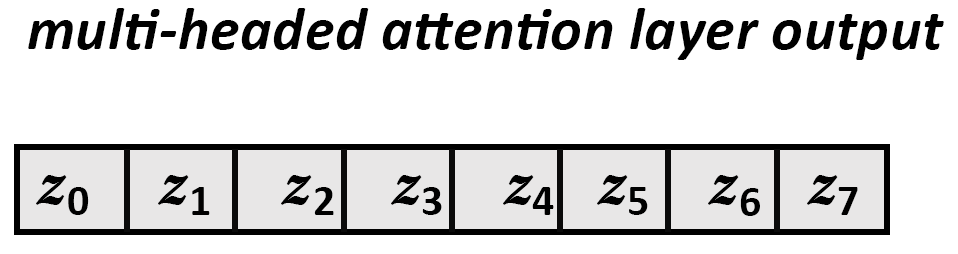

In [25]:
display(get_image_from_github('B19899_02_18.png') or print('Image not found'))

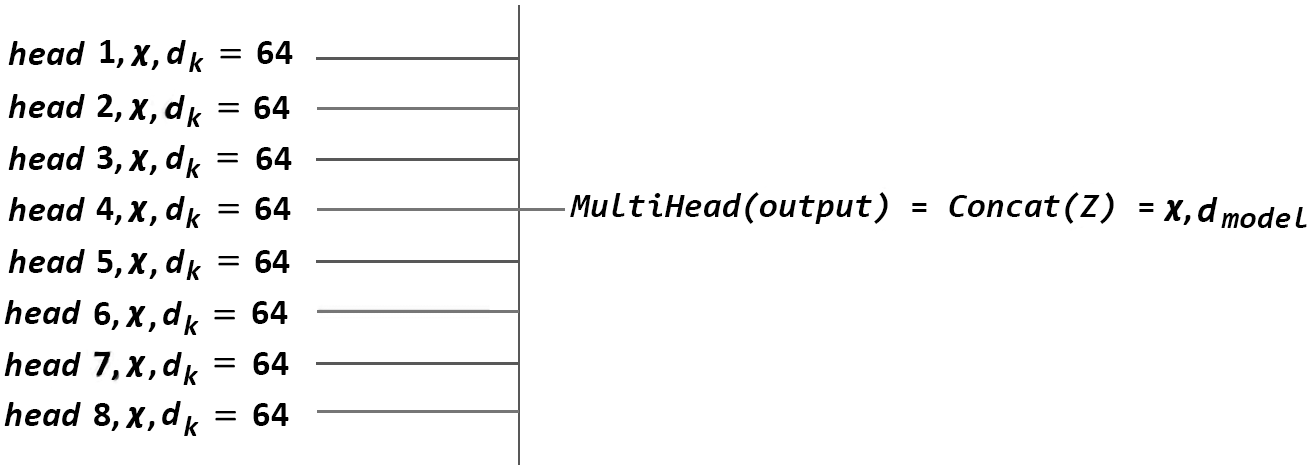

In [26]:
display(get_image_from_github('B19899_02_19.png') or print('Image not found'))

And now with Hugging Face in one line!

In [27]:
#@title Transformer Installation
!pip -q install transformers

In [28]:
#@title Retrieve pipeline of modules and choose English to French translation
from transformers import pipeline
translator = pipeline("translation_en_to_fr")
#One line of code!
print(translator("It is easy to translate languages with transformers", max_length=40))

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

[{'translation_text': "Il est facile de traduire des langues à l'aide de transformateurs"}]
